<a href="https://colab.research.google.com/github/AlbertChero/QuimicaSMGOD/blob/main/Practica_calificada_2/Alberto_Luis_Gil_SIxi_PC_2_Quimica_UNMSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{UNMSM | Química}$$
$$\large \textbf{PC Nº2 | Materia y clasificación}$$

_Profesor: Jesus Alvarado Huayhuaz_

Todas las indicaciones para la presentación de la práctica son explicadas en clase y brindadas en el material de enunciado de preguntas en formato PDF.

## Pregunta 1: DataFrames y listas en python (4 puntos)

Usando PeriodicTable, crea una tabla con 20 elementos químicos y en las columnas considera: nombre, simbolo, masa_atomica, numero_atomico	y valencias. Puedes ayudarte del siguiente [material](https://github.com/inefable12/UNMSM_quimica_2023/blob/main/Python_para_quimica_2023.ipynb).

In [3]:
!pip install rdkit
from rdkit import Chem
PeriodicTable = Chem.GetPeriodicTable()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 21.9 MB/s eta 0:00:00


In [4]:
element_symbols = []

for i in range(1,22):
  element_symbols.append(PeriodicTable.GetElementSymbol(i))
numero_atomico = [PeriodicTable.GetAtomicNumber(x) for x in element_symbols]
masa_atomica = [PeriodicTable.GetAtomicWeight(x) for x in element_symbols]
nombre_del_elemento = [PeriodicTable.GetElementName(x) for x in range(1,22)]
valencias = [PeriodicTable.GetValenceList(x) for x in range(1,22)]
import pandas as pd

data = {'nombre': nombre_del_elemento, 'simbolo': element_symbols,
        'masa_atomica': masa_atomica, 'numero_atomico': numero_atomico,
        'valencias': valencias}
df = pd.DataFrame(data)
df


,nombre,simbolo,masa_atomica,numero_atomico,valencias
0,Hydrogen,H,1.008,1,[1]
1,Helium,He,4.003,2,[0]
2,Lithium,Li,6.941,3,"[1, -1]"
3,Beryllium,Be,9.012,4,[2]
4,Boron,B,10.812,5,[3]
5,Carbon,C,12.011,6,[4]
6,Nitrogen,N,14.007,7,[3]
7,Oxygen,O,15.999,8,[2]
8,Fluorine,F,18.998,9,[1]
9,Neon,Ne,20.180,10,[0]


## Pregunta 2: Configuración electrónica (4 puntos)

Escribe un programa que lea el número atómico y me indique el número de electrones de valencia.

In [ ]:
# Número de protones como input
numero_atomico = int(input("ingresa el número de protones: "))
# Completa con tu código

ingresa el número de protones: 8


In [85]:
try:
    numero_atomico = int(input("Ingrese el número atómico de su elemento: "))


    nivel = 1
    electrones_contados = 0


    while electrones_contados < numero_atomico:

        if nivel == 1:
            electrones_nivel = 2
        elif nivel == 2:
            electrones_nivel = 8
        else:
            electrones_nivel = 18


        electrones_contados += electrones_nivel


        if electrones_contados >= numero_atomico:
            break

        nivel += 1

    electrones_valencia = numero_atomico - (electrones_contados - electrones_nivel)


    print(f"Los electrones de valencia del elemento con número atómico {numero_atomico} pertenecen al nivel de energía {nivel}.")
    print(f"El número de electrones de valencia es {electrones_valencia}.")
except ValueError:
    print("Número atómico válido.")

Ingrese el número atómico de su elemento: 8
Los electrones de valencia del elemento con número atómico 8 pertenecen al nivel de energía 2.
El número de electrones de valencia es 6.


# Pregunta 3: Molecularidad & compuestos covalentes (4 puntos)

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

Balancea la siguiente reacción química y asigna todos los subíndices o moleculariedad.

In [ ]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

In [ ]:
!pip install ChemPy

In [10]:

from chempy import balance_stoichiometry

reactivos, productos = balance_stoichiometry({'C4H8','O2'},{'CO2','H2O'})
coeficientes_reactivos = list(reactivos.values())
coeficientes_productos = list(productos.values())
print("Ecuación balanceada en ChemPy: ",coeficientes_reactivos[0]," C4H8 + ",coeficientes_reactivos[1]," O2 = ",coeficientes_productos[0]," CO2 + ",
coeficientes_productos[1]," H2O")

print("Total de molecularidad: ",coeficientes_reactivos[0]+coeficientes_reactivos[1])

Ecuación balanceada en ChemPy:  1  C4H8 +  6  O2 =  4  CO2 +  4  H2O
Total de molecularidad:  7


## Pregunta 4: SMILES, RDKit y Open Babel (4 puntos)

Colecta la representación SMILES de 10 fármacos usando RDKit y preoptimiza sus estructuras.

In [ ]:
!pip install rdkit



from rdkit.Chem import MolFromSmiles
from rdkit.Chem import AllChem

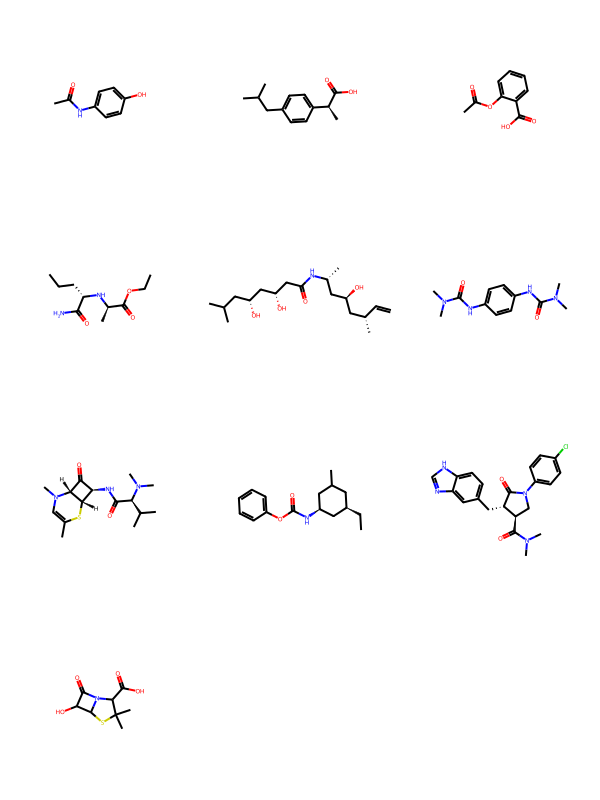

In [71]:
from rdkit import Chem
from rdkit.Chem import Draw

antiTBC = ['CC(=O)Nc1ccc(O)cc1','CC(C)Cc1ccc(cc1)[C@H](C)C(=O)O','CC(=O)OC1=CC=CC=C1C(=O)O','CCOC([C@@H](C)N[C@@H](CCC)C(N)=O)=O',
           'CC(C)C[C@@H](O)C[C@@H](O)CC(=O)N[C@H](C)C[C@@H](O)C[C@@H](C)C=C','CN(C)C(=O)Nc1ccc(NC(=O)N(C)C)cc1','CC1=CN([C@H]2[C@@H](S1)[C@@H](C2=O)NC(=O)[C@H](C(C)C)N(C)C)C',
           'CC[C@H]1C[C@@H](NC(=O)OC2=CC=CC=C2)CC(C)C1','CN(C)C(=O)[C@@H]1CN(c2ccc(Cl)cc2)C(=O)[C@H]1Cc3ccc4[nH]cnc4c3','CC1(C(N2C(S1)C(C2=O)O)C(=O)O)C']
mol_lista = []

for i in antiTBC:
  mol = Chem.MolFromSmiles(i)
  mol_lista.append(mol)
Draw.MolsToGridImage(mol_lista)

## Pregunta 5: Método científico (4 puntos)

Leer el artículo disponibilizado por el profesor y explica cómo es aplicado el método científico. Emplea como máximo 300 palabras.

El artículo describe que se aplicó un modelo didáctico basado en el uso de cajas de huevos y bolas de ping-pong para enseñar las propiedades periódicas de los elementos a nivel electrónico y la estructura atómica. Para evaluar la efectividad de este modelo, se aplicó en tres grupos de estudiantes de la Corporación Universitaria Unilasallista con edades entre 18 y 22 años. Se midió el rendimiento de los estudiantes en la actividad evaluativa y se presentaron los resultados en un gráfico de histograma de frecuencias vs intervalos de calificación. Los resultados mostraron que cerca del 100% de los estudiantes en los tres grupos fueron aprobados en esta actividad y se consideró que sus conocimientos estaban en un nivel medio-alto. Entre un 65 y 78% de los estudiantes en los 3 grupos, obtuvieron un intervalo de notas sobresaliente, entre 4,0 y 5,0, indicando que el modelo fue exitoso en su objetivo de brindar a los jóvenes una ayuda didáctica, para ser aplicada en la comprensión de la estructura atómica, las propiedades periódicas y la aplicación del principio de Aufbau y el principio de Hund.

En resumen, se puede inferir que se aplicó el método científico en el desarrollo y evaluación del modelo didáctico propuesto, ya que se formuló una hipótesis (el modelo sería efectivo para enseñar las propiedades periódicas de los elementos a nivel electrónico y la estructura atómica), se diseñó un experimento (aplicación del modelo en tres grupos de estudiantes), se midieron los resultados (rendimiento de los estudiantes en la actividad evaluativa) y se presentaron los datos de manera cuantitativa (gráfico de histograma de frecuencias vs intervalos de calificación).